In [177]:
#!/usr/bin/python
import os
import inspect
import operator
from itertools import islice, izip
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from numpy import genfromtxt
import scipy.spatial.distance as ssd
import sys
import pandas as pd
import seaborn as sns
from matplotlib.colors import LogNorm
%matplotlib inline


def intersect(a, b):
    return list(set(a) & set(b))

def union(a, b):
    return list(set(a) | set(b))

In [178]:
def subword_len(a,n=1):
    
    split_list = [a[i:i+n] for i in range(0, len(a), 1)]
    
    return [x  for x in split_list if len(x) == n and len(x)>0]

def subword(a):
    b=[a]
    nmax=len(a)
    for n in range(nmax):
        c=subword_len(a,n)
        if len(c)>0:
            b=np.append(b,c)
    return b

def jcq(a,b):
    aa=subword(a)
    bb=subword(b)
    uu=union(aa, bb)
    ii=intersect(aa,bb)
    return (len(uu)-len(ii))/(0.0+len(uu))

def randstr(n):
    arr = np.random.randint(2, size=(n,))
    return str(arr).replace('[','').replace(' ','').replace(']','')

In [179]:

subword('001010')

array(['001010', '0', '0', '1', '0', '1', '0', '00', '01', '10', '01',
       '10', '001', '010', '101', '010', '0010', '0101', '1010', '00101',
       '01010'], 
      dtype='|S6')

In [180]:
V={}
for N in [30,50,80,100,200]:
    v={}
    s=randstr(N)
    for i in range(1000):
        #s=randstr(N)
        #w=randstr(N)
        pos=np.random.randint(len(s), size=(1,))
        w=s[:pos[0]] + s[(pos[0]+1):]
        v[i]=jcq(s,w)
    V[N]=pd.Series(v)

VS1=pd.DataFrame(V)

#ax=sns.distplot(V)
#ax.set_title('distance between random strings')
#print(" ")

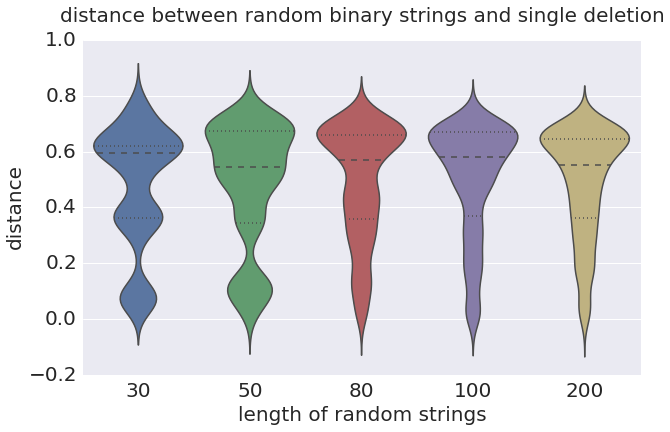

In [469]:
fig=plt.figure(figsize=(10,6))
ax=fig.gca()
sns.violinplot(VS1)
ax.tick_params(labelsize=20)
ax.set_xlabel('length of random strings',fontsize=20)
ax.set_ylabel('distance',fontsize=20)
ax.set_title('distance between random binary strings and single deletion',
                 fontsize=20,y=1.04)

outfile='s1d'
plt.savefig(outfile + '.pdf',dpi=1200, bbox_inches='tight')
plt.savefig(outfile + '.png',dpi=300, bbox_inches='tight',transparent=True)
print(" ")

In [182]:
V={}
for N in [30,50,80,100,200]:
    v={}
    s=randstr(N)
    for i in range(1000):
        #s=randstr(N)
        #w=randstr(N)
        pos=np.random.randint(len(s), size=(1,))
        w=s[:pos[0]] + s[(pos[0]+1):]
        pos=np.random.randint(len(s), size=(1,))
        w=s[:pos[0]] + s[(pos[0]+1):]
        v[i]=jcq(s,w)
    V[N]=pd.Series(v)

VS2=pd.DataFrame(V)

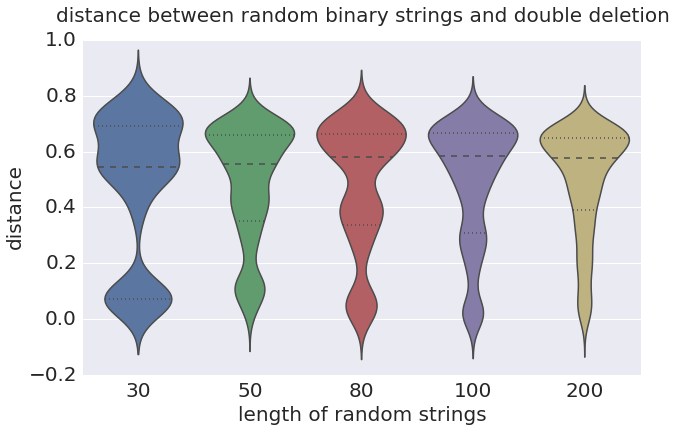

In [468]:
fig=plt.figure(figsize=(10,6))
ax=fig.gca()
sns.violinplot(VS2)
ax.tick_params(labelsize=20)
ax.set_xlabel('length of random strings',fontsize=20)
ax.set_ylabel('distance',fontsize=20)
ax.set_title('distance between random binary strings and double deletion',fontsize=20,y=1.04)

outfile='s2d'
plt.savefig(outfile + '.pdf',dpi=1200, bbox_inches='tight')
plt.savefig(outfile + '.png',dpi=300, bbox_inches='tight',transparent=True)

print(" ")

In [189]:
V={}
for N in [10, 20, 30,50,80,100,200]:
    v={}
    for i in range(1000):
        pos=np.random.randint(len(s), size=(1,))
        w=s[:pos[0]] + s[(pos[0]+1):]
        s=randstr(N)
        w=randstr(N)
        v[i]=jcq(s,w)
    V[N]=pd.Series(v)

VS=pd.DataFrame(V)

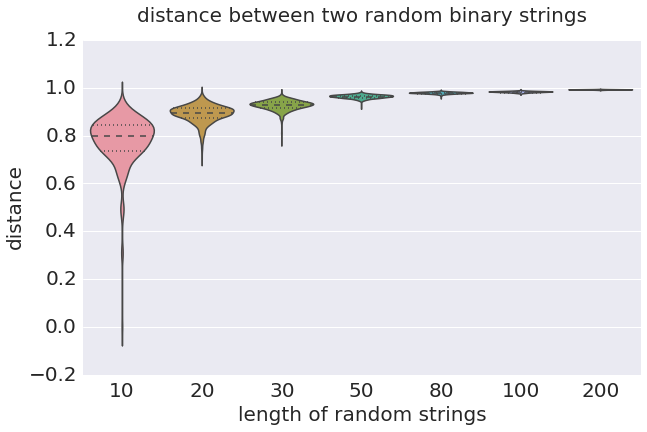

In [474]:
fig=plt.figure(figsize=(10,6))
ax=fig.gca()
ax=sns.violinplot(VS)
ax.tick_params(labelsize=20)
ax.set_xlabel('length of random strings',fontsize=20)
ax.set_ylabel('distance',fontsize=20)
ax.set_title('distance between two random binary strings',fontsize=20,y=1.04)
outfile='s3d'
plt.savefig(outfile + '.pdf',dpi=1200, bbox_inches='tight')
plt.savefig(outfile + '.png',dpi=300, bbox_inches='tight',transparent=True)
print(" ")

In [478]:
import random
V={}
for N in [10, 20, 30,50,80,100,200]:
    v={}
    for i in range(1000):
        s=randstr(N)
        w=''.join(random.sample(s,len(s)))
        v[i]=jcq(s,w)
    V[N]=pd.Series(v)

VSs=pd.DataFrame(V)

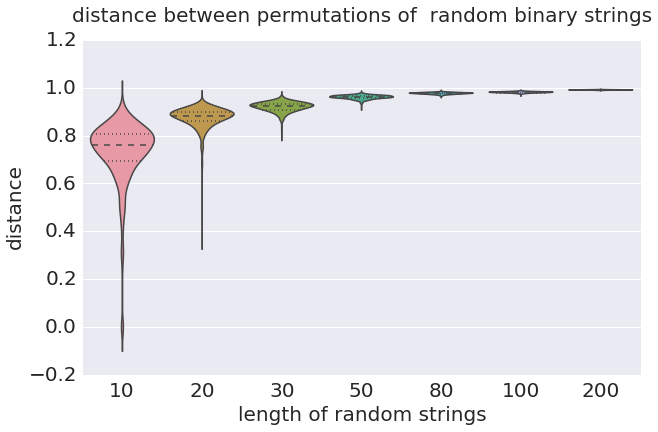

In [480]:
fig=plt.figure(figsize=(10,6))
ax=fig.gca()
ax=sns.violinplot(VSs)
ax.tick_params(labelsize=20)
ax.set_xlabel('length of random strings',fontsize=20)
ax.set_ylabel('distance',fontsize=20)
ax.set_title('distance between permutations of  random binary strings',fontsize=20,y=1.04)
outfile='s5d'
plt.savefig(outfile + '.pdf',dpi=1200, bbox_inches='tight')
plt.savefig(outfile + '.png',dpi=300, bbox_inches='tight',transparent=True)
print(" ")

In [271]:
VS00={}
for N in [20,40,60,80,100,120]:
    V={}
    v={}
    s=randstr(N)
    for i in range(N):
        for k in range(100):
            w=s
            for j in range(i):
                pos=np.random.randint(len(w), size=(1,))
                w=w[:pos[0]] + w[(pos[0]+1):]
            v[k]=jcq(s,w)
        V[i]=pd.Series(v)
    VS00[N]=pd.DataFrame(V).transpose()


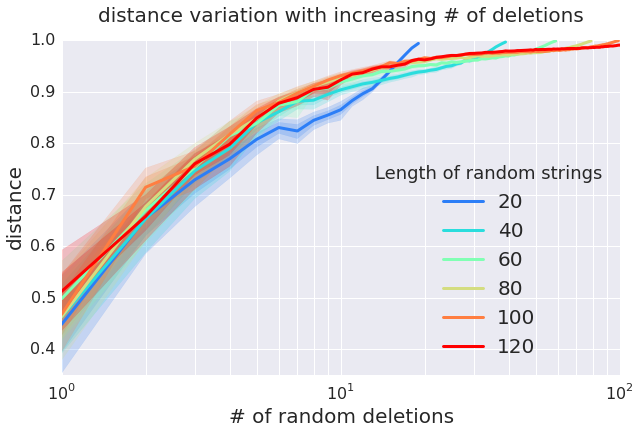

In [494]:
#from pandas.tools.plotting import andrews_curves
#VS00=pd.DataFrame(V)
import matplotlib.colors as colors
import matplotlib.cm as cmx
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=120)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='rainbow')

fig=plt.figure(figsize=(10,6))
ax=fig.gca()

for N in [20,40,60,80,100,120]:
    A=[]
    for i in range(100):
        A.append(VS00[N][i].values)
        
        
        #    cmap = sns.cubehelix_palette(start=N, light=1, as_cmap=True)
#    fig=plt.figure(figsize=(8,8))
#    ax=fig.gca()
#    sns.kdeplot(VS00[N],cbar=True)
    ax=sns.tsplot(A,ci=[95,99.9999999999999999],legend=True,condition=N,
                  color=scalarMap.to_rgba(N),linewidth=3)
#    VS00[N].transpose().plot.kde(ax=ax,legend=False,label=N)
#    ax=sns.violinplot(VS00[N],shade=False)
    print(" ")
ax.tick_params(labelsize=16)
ax.set_ylim(0.35,1)
ax.set_xlim(1,100)
ax.set_xscale("log")
ax.set_xlabel('# of random deletions',fontsize=20)
ax.set_ylabel('distance',fontsize=20)
ax.set_title('distance variation with increasing # of deletions',fontsize=20,y=1.04)
legend=plt.legend(title='Length of random strings',loc='best', fontsize = 20)
legend.get_title().set_fontsize(18) 
outfile='s4d'
plt.savefig(outfile + '.pdf',dpi=1200, bbox_inches='tight')
plt.savefig(outfile + '.png',dpi=300, bbox_inches='tight',transparent=True)
print(" ")